# Handwriting Recognition

This Jupyter Notebook uses neural networks to TBD.

<!--

## Approach
* Evaluations of classification performed were performed using 2 sample datasets:
    * sklearn's Iris sample dataset, consisting of 150 sample data points for 3 varieties of iris flowers
    * voice dataset, containing 3168 sample data points of male and female speakers

* Hyper-parameter tuning was performed using a GridSearch estimator for each classification model:
    
* Parameters providing the best scores and associated scores were plotted
    
## Results
* Refer to the Figures and Table of results provided below
* Hyperparameter tuning provided by sklearn GridSearchCV provided a convenient method of evaluating many classification model parameter sets in an efficient way.  The blue dots represent the optimal parameter sets selected for each Dataset/Classification Model, and the grey dots represent suboptimal parameter sets.
* For the Iris dataset, the Support Vector Machine SVC model provided the  combination of best score of 0.964 and Mean Fit Time of 0.200 ms, with Random Forest and Decision Tree classifiers providing close performance.
* For the Voice dataset, the SVC classifer also had the hightest Best Score at 0.980, which was slightly above the performance of the Random Forest classifier.  With SVC, the fit time was singificantly higher for the Voice dataset (40.6 ms) than for the Iris dataset (0.2 ms), which is expected given the larger number of features associated with the Voice dataset (20) vs. the Iris dataset (4)
* It's interesting to note that the K-Nearest Neighbors classifier, while performing lower amongst these models, operated with fast Mean Fit Time (3.2 ms) for Voice, which might make using KNN a good choice vs. other more calculation-intensive options in cases where lower fit time is more important than optimum accuracy.

-->

| Figure: Neural Network Performance: Best Score vs. Mean Fit Time (ms) | 
| :----------: |
| ![Figure: Neural Network Performance: Best Score vs. Mean Fit Time (ms) is Loading...](docs/Figure-Neural_Network_Performance-A.png "Figure: Neural Network Performance: Best Score vs. Mean Fit Time (ms)") |

<!--

| Figure: Tuned Classifier Performance: Best Score vs. F1 Score - All Datasets/Classifiers | Figure: Tuned Classifier Performance: Precision vs. Recall - All Datasets/Classifiers |
| :----------: | :----------: |
| ![Figure: Tuned Classifier Performance: Best Score vs. F1 Score - All Datasets/Classifiers is Loading...](docs/Figure-Hyper_Parameter_Tuning-BestScore_vs_F1-Combined.png "Figure: uned Classifier Performance: Best Score vs. F1 Score - All Datasets/Classifiers") | ![Figure: Tuned Classifier Performance: Precision vs. Recall - All Datasets/Classifiers is Loading...](docs/Figure-Hyper_Parameter_Tuning-Precision_vs_Recall-Combined.png "Figure: Tuned Classifier Performance: Precision vs. Recall - All Datasets/Classifiers") |

| Figure: Tuned Classifier Performance - Subplots |
| :----------: |
| ![Figure: Tuned Classifier Performance - Subplots is Loading...](docs/Figure-Hyper_Parameter_Tuning-Subplots.png "Figure: Tuned Classifier Performance - Subplots") |

| Table: Tuned Classifier Performance |
| :----------: |
| ![Table: Tuned Classifier Performance is Loading...](docs/Table-Hyper_Parameter_Tuning.png "Table: Tuned Classifier Performance") |

-->

# Dependencies

In [1]:
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D    # Support 3D graphing

import numpy as np
import pandas as pd
from pandas.plotting import table
import math
import random

from pprint import pprint

# Visualization
import graphviz
import pydotplus
from IPython.display import Image

# Machine Learning - Data Preparation and Pre-Processing
from sklearn.model_selection import train_test_split # Split data into training and testing samples
from sklearn.model_selection import cross_val_score  # Score a model using k-fold or other cross validation

from sklearn.preprocessing import OneHotEncoder   # Convert categorical integer features (X) to One-Hot encoded values
from sklearn.preprocessing import LabelEncoder    # Convert categorical labeled values to categorical integer values
from sklearn.preprocessing import LabelBinarizer  # Convert categorical labeled values to Binary encoded values

from sklearn.preprocessing import StandardScaler  # Scale numerical features to standard normal distribution
from sklearn.preprocessing import MinMaxScaler    # Scale numerical values based upon mix/max values

# Machine Learning - Sci-Kit Learn - Models - Regression
from sklearn.linear_model import LinearRegression  # TBD
from sklearn.linear_model import Lasso             # TBD
from sklearn.linear_model import Ridge             # TBD
from sklearn.linear_model import ElasticNet        # TBD

# Machine Learning - Sci-Kit Learn - Models - Classification
from sklearn.linear_model import LogisticRegression   # Logistic Regression Classifier
from sklearn import tree                              # Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier   # Random Forest Classifier
from sklearn import svm                               # Support Vector Machine Classifier
from sklearn.neighbors import KNeighborsClassifier    # K-Nearest Neighbors (KNN)

# Machine Learning - GridSearch for Hyper-Parameter tuning
from sklearn.model_selection import GridSearchCV      # Grid Search

# Machine Learning - Quantify Model Performance
from sklearn.metrics import mean_squared_error    # Mean Squared Error (MSE) metric
from sklearn.metrics import r2_score              # R-squared (Coefficient of Determination) metric
from sklearn.metrics import confusion_matrix      # Generate a confusion matrix (actual vs. predicted counts)
from sklearn.metrics import classification_report # Calculate metrics for prediction performance
from sklearn.metrics import precision_score       # Calculate the precision: Tp / (Tp + Fp) => Ability to avoid false negatives
from sklearn.metrics import recall_score          # Calculate the recall: Tp / (Tp + Fn) => Ability to find all positive samples
from sklearn.metrics import f1_score              # Calculate the F1 score: 2*(precision*recall)/(precision+recall)

# Machine Learning - Dataset Generation
from sklearn.datasets import make_regression     # Generate linear data
from sklearn.datasets import make_s_curve        # Generate nonlinear data
from sklearn.datasets import make_blobs          # Generate blobs for classification
from sklearn.datasets import make_circles        # Generate circles for classification
from sklearn.datasets import load_iris           # Sample multi-class dataset for classification
from sklearn.datasets import make_classification # Generate datasets for classification

# Machine Learning - Keras (Tensorflow) - Models
from keras.models import Sequential               # Sequential model serving as foundation for neural network
from keras.layers import Dense                    # Nodes for specifying input, hidden, and output layers

# Machine Learning - Keras (Tensorflow) - Encoding
from keras.utils import to_categorical            # One-Hot Encoder provided through Keras

# Machine Learning - Keras (Tensorflow) - Other related Tools
from keras.utils import plot_model                # Plot a neural network model
from keras.models import load_model               # Load a saved machine learning model
from keras.preprocessing import image             # Loads an image for application of machine learning
from keras.preprocessing.image import img_to_array # Converts an image to a numpy array

# Machine Learning - Keras (Tensorflow) -  Dataset Generation
from keras.datasets import mnist                  # Images: Handwritten digits 0-9 (28x28 grayscale, 60K train, 10K test)



C:\Users\dadja\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
Using TensorFlow backend.
C:\Users\dadja\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\dadja\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\d

# Handwritten Digits 0-9 Dataset

### Function to Plot Lists of Digits

In [2]:
# Function to plot a list of up to 10 digits on a single subplot
def plot_digit_list( a_X_list = None, a_y_list = None, a_find_all_digits = False):
    # The first 10 digits from the specified list
    
    # If no list is specified then return None        
    if (a_X_list is None):
        return None
    
    else:
        X_list = list(a_X_list)
        
    if (a_y_list is None):
        return None
    
    else:
        y_list = list(a_y_list)
        
    # Find All Digits flag
    #   If True => Find and plot all digits 0-9 within the list, starting at index 0
    #   If False => Plot up to the first 10 digits in the list
    if a_find_all_digits:

        # Flag is True: Get indices of samples for each of the digits 0-9 within the 1000 sample subset
        # If the digit is not present in the input list then move on to the next digit
        d_i_list = []
        for d in range(10):
            
            try:
                # Add the index at which this digit can be found to the list
                d_i_list.append( y_list.index(d) )
                
            except ValueError:
                # Digit is not present in the input list -- move on to the next digit
                pass

    else:
        # Flag is False: Get the indices for up to the first 10 values in the list
        d_i_list = range( min(10, len(y_list) ))
    
    # The iterpolation method to use for ploting the digit images
    i_type_selected = 'lanczos'

    print("Indices:", d_i_list)

    # Plot Classification Performance results: Best Score vs. Mean Fit Time (ms)
    fig = plt.figure(figsize=(20,9))

    # Create subplots for each of the sampled digits
    for i in range(len(d_i_list)):
        # Create a subplot for this iteration
        ax = fig.add_subplot( math.ceil(len(d_i_list)/min(5, len(d_i_list))), min(5, len(d_i_list)), i+1 )

        # Display a note for each subplot
        point_text = f"Digit: {y_list[d_i_list[i]]}"
        point_text += f"\nSample Index: {d_i_list[i]}"
    #     ax.text(1, 2+1.4*point_text.count("\n"), point_text )
        ax.set_title(point_text)

        # Display the image
        ax.imshow(X_list[d_i_list[i]], cmap=plt.cm.Greys, interpolation=i_type_selected)
        
    # Return the number of digits plotted
    return i+1

### Load the MNIST Handwritten Digit Dataset

In [3]:
# Import the Iris sample dataset as a dictionary
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Indices: [1, 3, 5, 7, 2, 0, 13, 15, 17, 4]


10

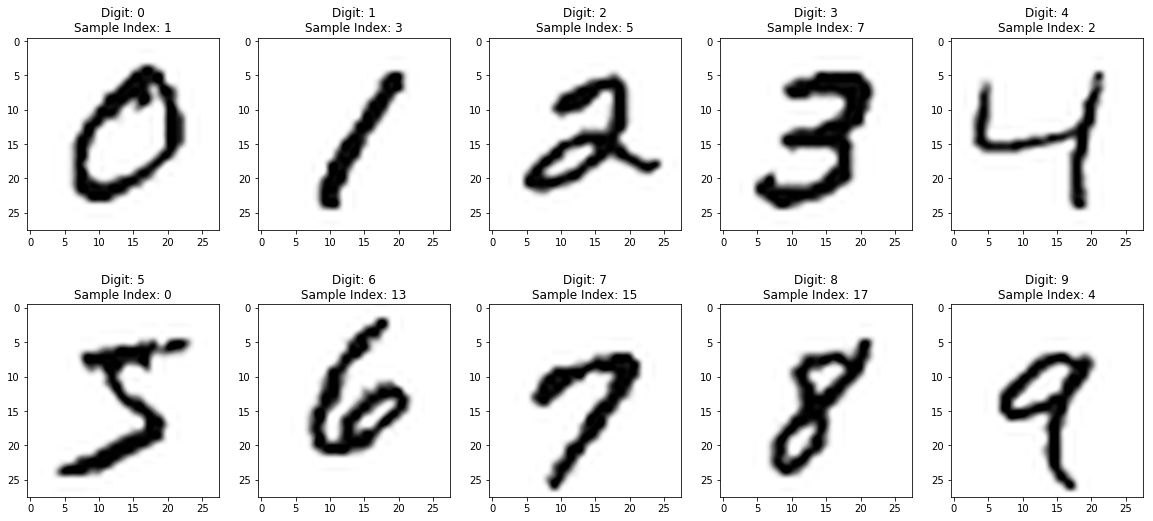

In [4]:
plot_digit_list(X_train, y_train, True)

In [5]:
# Display the current shape of the input and output data
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Flatten the 28x28 pixel images to a 1D array of 784 pixels
ndims = X_train.shape[1] * X_train.shape[2]
X_train_flat = X_train.reshape(X_train.shape[0], ndims)
X_test_flat = X_test.reshape(X_test.shape[0], ndims)
print(X_train_flat.shape, X_test_flat.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(60000, 784) (10000, 784)


In [6]:
# Use a scalar to scale the training data to values between 0 and 1 (MinMaxScalar)
# Q: How would the results differ if we applied StandardScalar instead of MixMaxScalar
x_scalar = MinMaxScaler().fit(X_train_flat)
X_train_scaled = x_scalar.transform(X_train_flat)
X_test_scaled = x_scalar.transform(X_test_flat)

C:\Users\dadja\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
# Apply One-Hot Encoding to the labels

# Ensure that all 10 digits are reflected in the encoding,
# even if they happen not to be in the training or test sets
n_classes = 10

y_train_encoded = to_categorical(y_train, n_classes)
y_test_encoded = to_categorical(y_test, n_classes)

In [8]:
# Display the shape of the input and output data
print(X_train_scaled.shape, y_train_encoded.shape, X_test_scaled.shape, y_test_encoded.shape)

(60000, 784) (60000, 10) (10000, 784) (10000, 10)


### Define the Neural Network model for multi-class, single-label classification

In [9]:
# Create a sequential model
model = Sequential()

In [10]:
# Number of Inputs:
n_inputs = X_train_scaled.shape[1]

# Number of Classes:
n_classes = y_train_encoded.shape[1]

# Add input and first layer - Number of Hidden Nodes: 10
model.add(Dense(units=20, activation='relu', input_dim=n_inputs))

# Add another hidden layer - Number of Hidden Nodes: 10
model.add(Dense(units=20, activation='relu'))

# Number of output nodes (units) needed = Number of classes
model.add(Dense(units=n_classes, activation='softmax'))

# Provide a summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


### Compile the Model

In [11]:
# Compile the model
# Optimizer: Adam
# Loss Function: Categorical Cross-Entropy for categorical data (Mean Squared Error for regression)
# Metrics: Accuracy
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Train the Model

In [12]:
#%%timeit -n1 -r1
# Fit (train) the model
hist = model.fit(
    X_train_scaled,
    y_train_encoded,
    epochs=10,
    shuffle=True,
    verbose=2
)

Epoch 1/10
 - 5s - loss: 0.4171 - acc: 0.8812
Epoch 2/10
 - 4s - loss: 0.2204 - acc: 0.9360
Epoch 3/10
 - 4s - loss: 0.1792 - acc: 0.9478
Epoch 4/10
 - 4s - loss: 0.1554 - acc: 0.9547
Epoch 5/10
 - 4s - loss: 0.1406 - acc: 0.9594
Epoch 6/10
 - 4s - loss: 0.1296 - acc: 0.9617
Epoch 7/10
 - 4s - loss: 0.1202 - acc: 0.9645
Epoch 8/10
 - 4s - loss: 0.1133 - acc: 0.9658
Epoch 9/10
 - 4s - loss: 0.1060 - acc: 0.9675
Epoch 10/10
 - 4s - loss: 0.1020 - acc: 0.9690


### Evaluate the Model

In [13]:
# Evaluate the model using the testing data
m_score_list = model.evaluate(X_test_scaled, y_test_encoded, verbose=2)
m_label_list = model.metrics_names

# Print the metrics and their associated labels
for i in range(len(m_score_list)):
    print(f"{m_label_list[i].title()}: {m_score_list[i]:0.4f}")

Loss: 0.1345
Acc: 0.9623


In [14]:
hist.history.keys()

dict_keys(['loss', 'acc'])

In [15]:
# Make some predictions using the testing data
s_min = 30
s_max = 40
y_encoded_predictions = model.predict_classes(X_test_scaled[s_min:s_max])
y_encoded_actuals = [ np.argmax(y_val.round()) for y_val in y_test_encoded[s_min:s_max] ]

In [16]:
# Summarize the prediction results in a dataframe
predict_sample_df = pd.DataFrame(
    {'Actual': y_encoded_actuals,
     'Prediction': y_encoded_predictions})

predict_sample_df['Correct'] = (predict_sample_df['Actual'] == predict_sample_df['Prediction'])
predict_sample_df

,Actual,Prediction,Correct
0,3,3,True
1,1,1,True
2,3,3,True
3,4,4,True
4,7,7,True
5,2,2,True
6,7,7,True
7,1,1,True
8,2,2,True
9,1,1,True


Indices: range(0, 10)


10

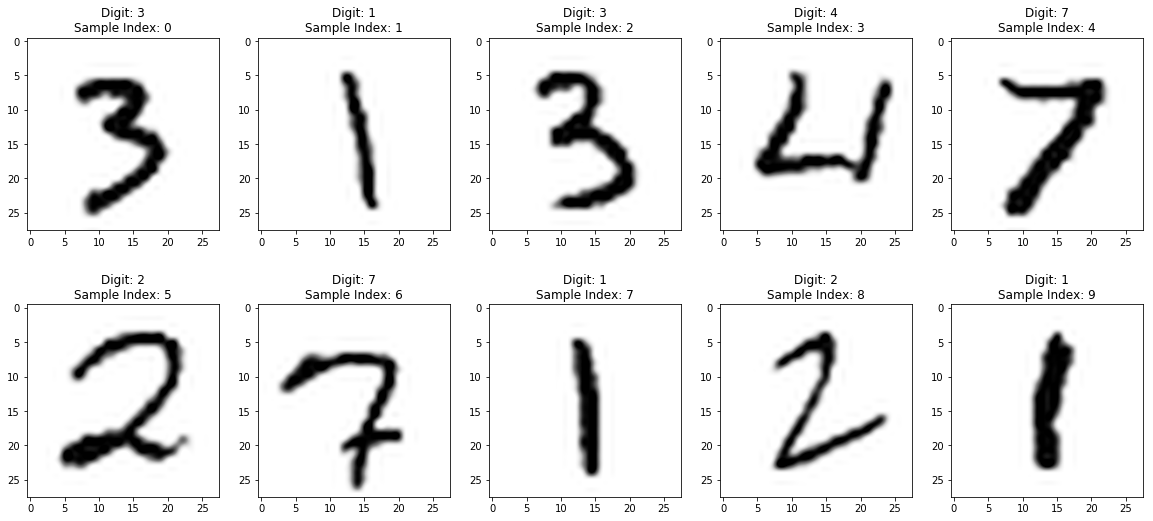

In [17]:
plot_digit_list(X_test[s_min:s_max], y_encoded_actuals, False)

### Save the Fitted Model

In [119]:
# Save the fitted model
model.save("mnist_digits_model.h5")

### Load a Fitted Model

In [120]:
# Reload the fitted model
prev_model = load_model("mnist_digits_model.h5")

In [20]:
# Make some predictions using the testing data
s_min = 30
s_max = 40
y_encoded_predictions = model.predict_classes(X_test_scaled[s_min:s_max])
y_encoded_actuals = [ np.argmax(y_val.round()) for y_val in y_test_encoded[s_min:s_max] ]

# Summarize the prediction results in a dataframe
predict_sample_df = pd.DataFrame(
    {'Actual': y_encoded_actuals,
     'Prediction': y_encoded_predictions})

predict_sample_df['Correct'] = (predict_sample_df['Actual'] == predict_sample_df['Prediction'])
predict_sample_df

,Actual,Prediction,Correct
0,3,3,True
1,1,1,True
2,3,3,True
3,4,4,True
4,7,7,True
5,2,2,True
6,7,7,True
7,1,1,True
8,2,2,True
9,1,1,True


### Import a Custom Image

In [121]:
# Reload the fitted model
prev_model = load_model("mnist_digits_model.h5")

In [122]:
# File path and name of the image to be processed
test_image_file = "resources/digit_test_2.png"
# test_image_file = "resources/digit_test_8.png"

In [123]:
# Import the image - known to be a PNG format file (28px height by 28px width, grayscale w/ 24 bit depth)
image_size = (28, 28)
test_image = image.load_img(test_image_file, target_size=image_size, grayscale=True)
test_image

C:\Users\dadja\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [124]:
# Convert the image to a numpy array
test_digit = img_to_array(test_image)
test_digit.shape

(28, 28, 1)

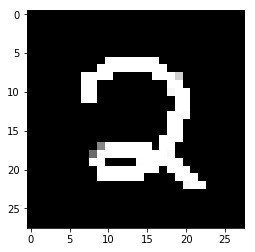

In [125]:
# Plot the test digit
# NOTE: This is light characters on dark background; the grayscale will be inverted later before prediction
plt.imshow(test_digit.reshape(28,28), cmap=plt.cm.Greys)

In [126]:
# Flatten the 28x28 pixel images to a 1D array of 784 pixels
test_digit_ndims = test_digit.shape[0] * test_digit.shape[1]
test_digit_flat = test_digit.reshape(-1, test_digit_ndims)
test_digit_flat.shape

(1, 784)

In [127]:
# Scale the test digit using the x_scaler already created
test_digit_scaled = x_scalar.transform(test_digit_flat)

# Scale the digit using a simple linear scaling
# test_digit_scaled = test_digit_flat / 255

# test_digit_scaled

In [128]:
# Invert the image so that the digit itself is dark vs light background
test_digit_scaled_inverted = 1 - test_digit_scaled

In [129]:
# Predict what number this is based upon the previously trained model
prev_model.predict_classes(test_digit_scaled_inverted)

array([2], dtype=int64)